# Stress: Stress in a T-Shaped Cross-Section

In this advanced example, we compute **normal, bending, and shear stresses** for a **T-shaped cross-section**, combining a flange and a web.  
This demonstrates how to handle more complex geometries using the `sstatics` framework.

You can find the example as an executable Python file [here](https://github.com/i4s-htwk/sStatics/blob/main/sstatics/examples/05_stress/08_t_cross_section_stress.py).

## Import Modules
We start by importing the required classes for defining the Stress object.

In [1]:
from sstatics.core.preprocessing import CrossSection
from sstatics.core.preprocessing.geometry.objects import Polygon
from sstatics.core.postprocessing import CrossSectionStress

## Create Cross-Section
We define the T-shape as two polygons:
- **Flange**: horizontal top part  
- **Web**: vertical connecting part

In [2]:
geometry = [
    Polygon([(0, 0), (30, 0), (30, 3), (0, 3), (0, 0)]),      # flange
    Polygon([(14, 3), (16, 3), (16, 43), (14, 43), (14, 3)])  # web
]

cs = CrossSection(geometry=geometry)

The CrossSection class calculates the geometric properties such as area, centroid, and boundaries.

## Create Stress-Object
Using the previously defined cross-section, we create an instance of `CrossSectionStress`.  
This object allows computation of normal stress ($\sigma$), bending stress ($\sigma_b$), and shear stress ($\tau$) for the section.

In [3]:
stress = CrossSectionStress(cs)

### Define Applied Loads
We apply:

Axial force: $N = 2$
Bending moment: $M = 10$
Shear force: $V = 10$

In [4]:
N = 2   # axial force
M = 10  # bending moment
V = 10  # shear force

### Geometric Parameters

The centroid $z_s$ and the cross-section boundaries are used to determine stress distributions:
Top distance to centroid: $z_\text{top} - z_s$
Bottom distance to centroid: $z_\text{bottom} - z_s$

In [5]:
# Centroid location
z_s = cs.center_of_mass_z

# Cross-section boundaries
_, zb = cs.boundary()
z_top, z_bottom = zb[0], zb[1]

# Distances to centroid
dist_top = abs(z_top - z_s)
dist_bottom = abs(z_bottom - z_s)

print("=== T Cross-Section Example ===")
print("Centroid at z_s =", z_s)
print(f"Distance top to centroid: {dist_top}")
print(f"Distance bottom to centroid: {dist_bottom}")

=== T Cross-Section Example ===
Centroid at z_s = 11.617647058823529
Distance top to centroid: 11.617647058823529
Distance bottom to centroid: 31.38235294117647


### Normal Stress

The normal stress due to axial force is uniform across the section:

In [6]:
# Normal stress: maximum occurs everywhere
print("Normal stress (maximum):", stress.normal_stress(N))

Normal stress (maximum): 0.011764705882352941


### Bending Stress


The bending stress is calculated using:

$$
\sigma_b(z) = \frac{M \cdot y}{I}
$$

- Maximum bending stress occurs at the **farthest distance from the centroid**, either at the top or bottom fiber.  
- If $z$ is not specified, the method automatically returns the maximum bending stress.

In [7]:
# Automatically returns maximum bending stress
print("Bending stress (maximum):", stress.bending_stress(M))

# Explicitly at the largest distance from centroid (illustrative)
print("Bending stress at the largest distance from centroid:",
      stress.bending_stress(M, z=z_bottom))

Bending stress (maximum): 0.010353175572198118
Bending stress at the largest distance from centroid: 0.010353175572198118


### Shear Stress

The shear stress distribution follows **Jourawski’s formula**:

$$
\tau(z) = \frac{V \cdot S(z)}{I \cdot t(z)}
$$

- Maximum shear occurs at the **centroid**.  
- To visualize the shear distribution along the web, we discretize the section:

In [8]:
# Shear stress: maximum occurs at centroid
print("Shear stress (maximum at centroid):", stress.shear_stress(V))

Shear stress (maximum at centroid): 0.162453504934344


Now we want to plot the shear distribution along the web of the T-shaped section.

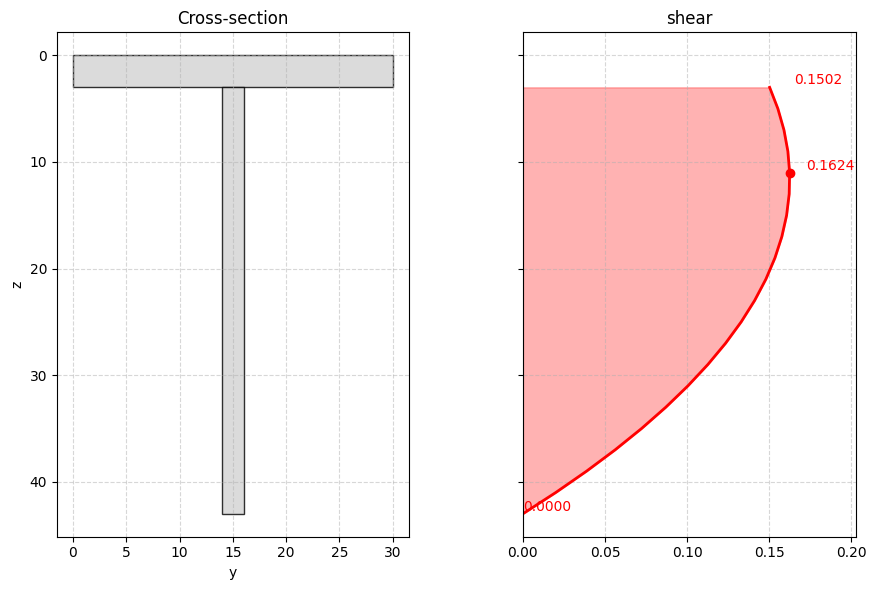

In [9]:
# Shear distribution for plotting along the web
stress.shear_stress_disc(v_z=V, z_i=3.01, z_j=43, n_disc=20)
stress.plot(kind="shear")